# Natural Language Processing Project

This notebook is from an exercise from the Python for Data Science and Machine Learning Bootcamp course (https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/). It contains some different approaches from the exercise.

___

In this NLP project we'll be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

___

# Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data


In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**creatting a new column called "text length" which is the number of words in the text column**

In [37]:
for i in yelp.index: yelp['text lenght'].iloc[i] = len(yelp['text'].iloc[i])

/home/tmartins/Documentos/Study/Udemy/udemy/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [153]:
# yelp['text length'] = yelp['text'].apply(len)

___
# EDA


**grid of 5 histograms of text length based off of the star ratings**

In [118]:
sns.set(style='whitegrid', palette='rainbow')

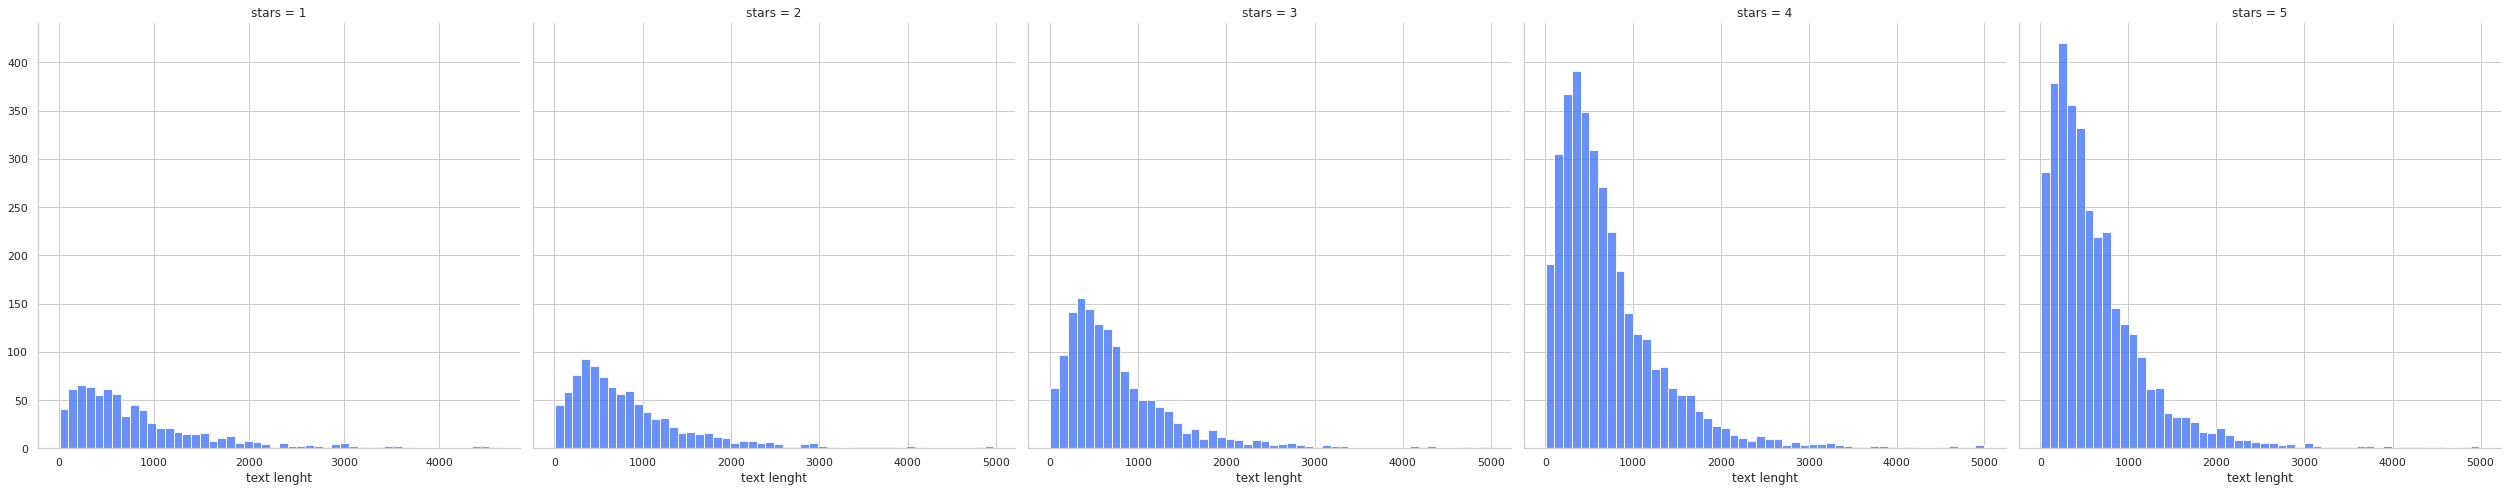

In [119]:
g = sns.FacetGrid(data=yelp, col='stars', sharex=False, height=7)
g.map(sns.histplot, 'text lenght', bins=50)

**boxplot of text length for each star category**

<AxesSubplot:xlabel='stars', ylabel='text lenght'>

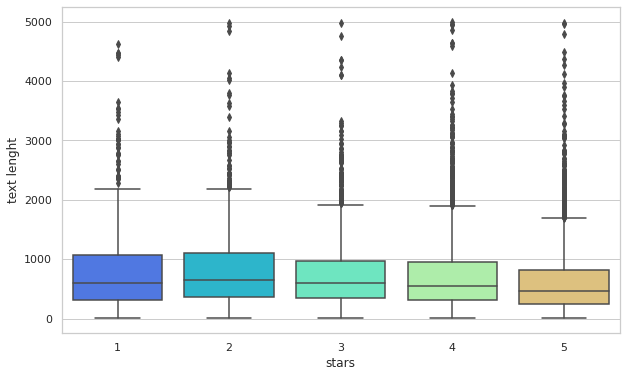

In [120]:
plt.figure(figsize=(10,6))
sns.boxplot(data=yelp, x='stars', y='text lenght')

**countplot of the number of occurrences for each type of star rating**

<AxesSubplot:xlabel='stars', ylabel='count'>

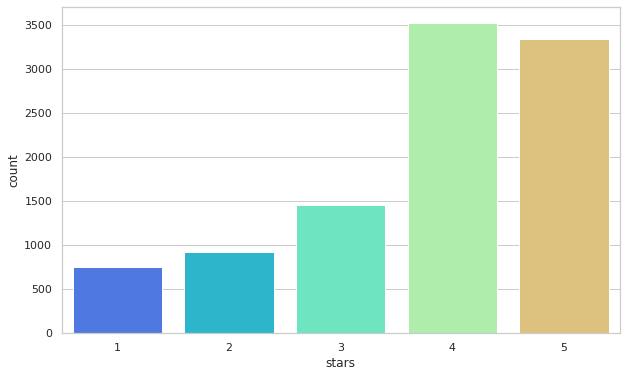

In [121]:
plt.figure(figsize=(10,6))
sns.countplot(data=yelp, x='stars')

In [62]:
yelp.groupby('stars').mean()

,cool,useful,funny,text lenght
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [64]:
yelp_corr = yelp.groupby('stars').mean().corr()
yelp_corr

,cool,useful,funny,text lenght
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text lenght,-0.857664,0.699881,0.843461,1.000000


**heatmap based off .corr() dataframe**

In [102]:
sns.color_palette()[3]

(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)

<AxesSubplot:>

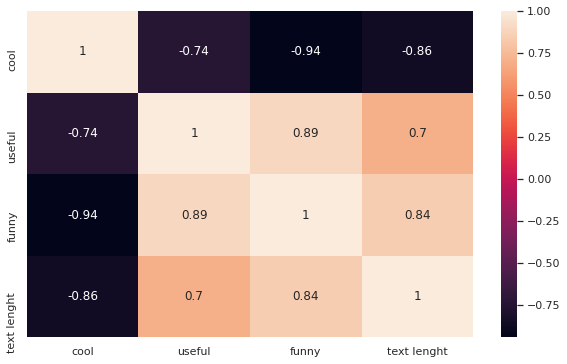

In [158]:
plt.figure(figsize=(10,6))
sns.heatmap(data=yelp_corr, annot=True)

___
# NLP Classification Task
**creattong a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews**

In [129]:
yelp_class = yelp.loc[(yelp['stars']==1) | (yelp['stars']==5)]

In [130]:
X = yelp_class['text']
y = yelp_class['stars']

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

In [132]:
X = count_vec.fit_transform(X)

## Train Test Split


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model


In [135]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [136]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations


In [137]:
predict = nb.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix, classification_report

In [139]:
print(confusion_matrix(y_test, predict))

[[159  69]
 [ 22 976]]


In [140]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



___
# Using Text Processing


In [141]:
from sklearn.feature_extraction.text import TfidfTransformer

In [142]:
from sklearn.pipeline import Pipeline

In [145]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline


### Train Test Split


In [148]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [149]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation


In [150]:
predict = pipeline.predict(X_test)

In [152]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/home/tmartins/Documentos/Study/Udemy/udemy/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tmartins/Documentos/Study/Udemy/udemy/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tmartins/Documentos/Study/Udemy/udemy/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo